# K-means clustering

## import library

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [226]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')
print(feature.shape)
print('feature',feature)

x = feature[:,0]
y = feature[:,1]
print('x',x)
print('y',y)
#feature = feature.T
print(feature)
number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

(1000, 2)
feature [[-2.78158782  6.13851704]
 [-5.79072687  3.00770345]
 [-8.85288476  3.99889271]
 ...
 [ 8.01075285  9.06955099]
 [ 1.12859575 -2.53389057]
 [ 0.03723381  8.87194034]]
x [-2.78158782e+00 -5.79072687e+00 -8.85288476e+00 -3.67216533e+00
 -3.67021515e+00 -1.05144286e+01 -8.54949738e+00  1.94045737e+00
  3.65244555e+00  3.70321502e-01 -9.69420098e+00  1.09174399e+00
 -1.47444777e+00  5.58401926e-01 -1.53676402e+00 -5.24384657e+00
 -4.79551352e-02 -1.84469926e+00 -8.88915220e+00 -2.05182018e-01
  2.05214537e+00  1.38754229e+00  5.56187907e-01 -5.32835229e+00
 -7.04085968e+00 -7.53109751e+00 -2.35905817e+00 -1.43503287e+00
  2.83790103e+00 -7.64040174e+00 -4.80086411e+00  5.28748884e+00
  2.59318403e+00  4.07755207e+00 -8.13029171e+00 -2.81427776e+00
 -8.72919829e+00 -8.22060592e+00 -5.67996441e+00  5.25622742e+00
 -7.85932772e+00  4.83203435e+00  2.09417660e+00 -9.12573688e+00
  1.56948446e+00  3.83353428e+00  2.37574897e+00 -4.80705148e+00
  1.01336027e-01 -1.01205511e+01

## plot the input data

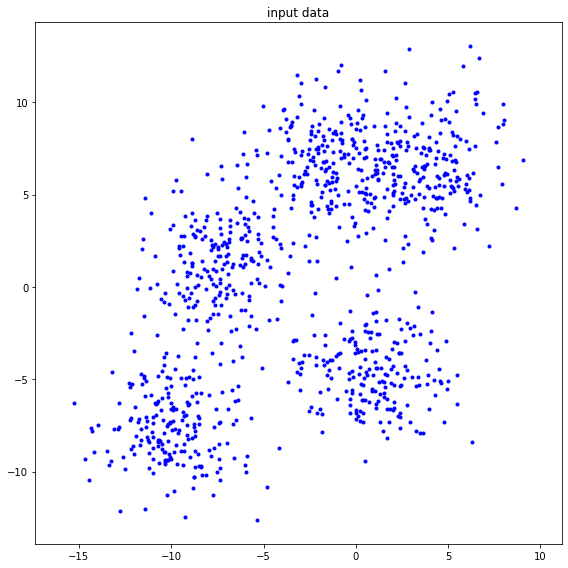

In [227]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x,y, c="b", marker=".")

plt.axis('equal')
plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [228]:
def compute_distance(feature, center):
    temp = center
    for i in range(np.size(feature, 0)-1):
        temp = np.vstack([temp,center])
    feature = feature - center
    feature = feature**2
    distance = feature.sum(axis=1)
    distance = np.sqrt(distance)
    
    
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [229]:
def compute_centroid(feature, label_feature, value_label):
    count = 0
    centroid     =  np.zeros( (1,np.size(feature, 1)))
    for i in range(np.size(feature,0)):
        if (label_feature[i] == value_label):
            centroid = feature[i] + centroid
            count = count + 1
    
    if (count!=0):
        centroid = centroid/count
        
    return centroid

In [230]:
def compute_loss(distance,label_feature):
    
    loss = 0
    
    for i in range(number_data):
        num = int(label_feature[i])
        loss = loss + distance[i][num]
    
    loss = loss/number_data
    
    return loss

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [231]:
def compute_label(distance):
    label_feature = np.argmin(distance, axis = 1)
    return label_feature

In [232]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 5
number_iteration    = 1000
# ===================================================

In [233]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
label_cluster = np.zeros(shape=(number_data, number_cluster))
label_feature = np.random.randint(number_cluster, size = number_data)

for i in range(number_iteration):

    for k in range(number_cluster):
        
        centroid[k] = compute_centroid(feature, label_feature, k)
        distance[:,k] = compute_distance(feature, centroid[k])
        if(centroid[k][0] == 0 and centroid[k][1]):
            centroid[k] = centroid_iteration[i-1][k]
        
    label_feature = compute_label(distance)
    centroid_iteration[i] = centroid
    loss_iteration[i] = compute_loss(distance,label_feature)

    print(loss_iteration[i])
    
label = compute_label(distance)
for i in range(number_data):
    for j in range(number_cluster):
        if(label[i]==j):
            label_cluster[i][j] = 1

[7.35163568]
[4.17143603]
[3.21600808]
[3.04547959]
[2.98526043]
[2.90093147]
[2.81470311]
[2.72348321]
[2.59983339]
[2.50545412]
[2.47298243]
[2.46407884]
[2.46378239]
[2.46360708]
[2.46378815]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[

[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4640512]
[2.4

## plot the results

In [234]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    # ===================================================
    # fill up the blank
    plt.scatter(feature[:,0],feature[:,1], c="b", marker=".")
    plt.axis('equal')
    plt.tight_layout()
    # ===================================================
    plt.tight_layout()
    plt.show()

In [235]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    # ===================================================
    plt.plot(loss_iteration, color = 'red')
    
    plt.xlabel('iteration')
    plt.ylabel('loss')
    # ===================================================
    plt.tight_layout()
    plt.show()

In [245]:
def plot_centroid(centroid_iteration):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    # ===================================================
    color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
                     '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    for i in range(number_cluster):
        i_str = str(i)
        plt.scatter(centroid_iteration[0,i,0],centroid_iteration[0,i,1], c="b",marker = "o",label='initial')
        plt.scatter(centroid_iteration[-1,i,0],centroid_iteration[-1,i,1], c="r",marker = "s",label='final')
        plt.plot(centroid_iteration[:,i,0],centroid_iteration[:,i,1], color = color_list[i],label='cluster = '+ i_str)

    plt.xlabel('iteration')
    plt.legend(loc='upper right')
    # ===================================================
    plt.tight_layout()
    plt.show()

In [247]:
def plot_cluster(feature, label_feature, label_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    # ===================================================
    color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
                     '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    color_num = label_cluster.shape[1]
    x = feature[:,0]
    y = feature[:,1]
    plt.scatter(x,y,c=label_feature,cmap=plt.cm.get_cmap('rainbow',color_num),s=20)
    plt.colorbar(ticks=range(color_num),label='cluster')
    
    # ===================================================
    plt.tight_layout()
    plt.show()


***

# results

***

1. plot the input data

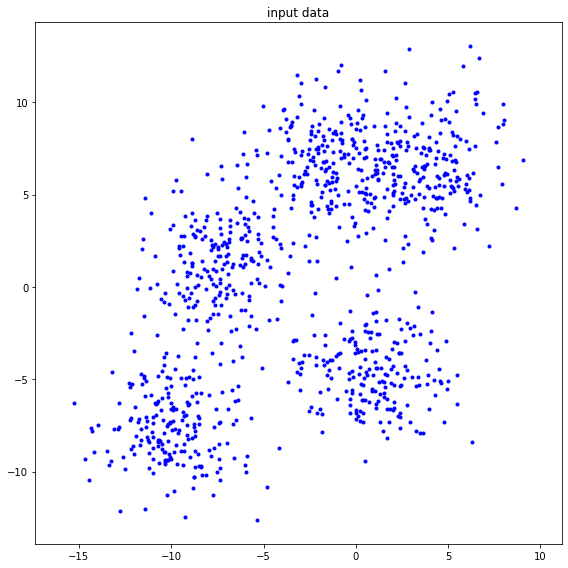

In [248]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

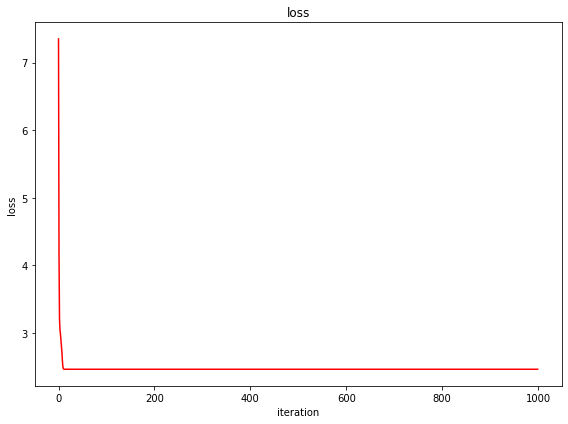

In [249]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

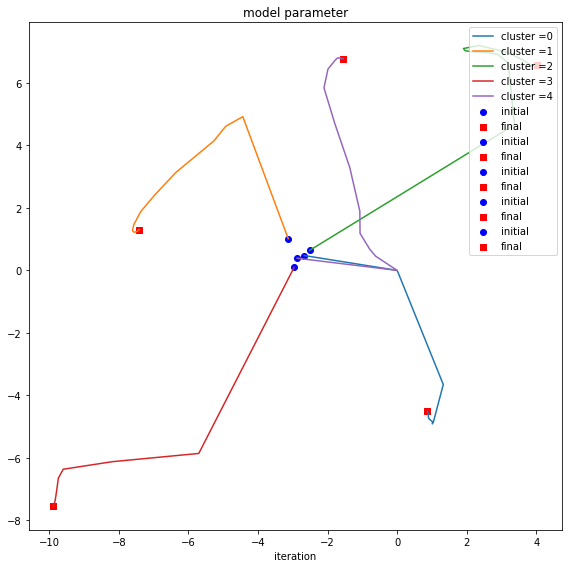

In [250]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

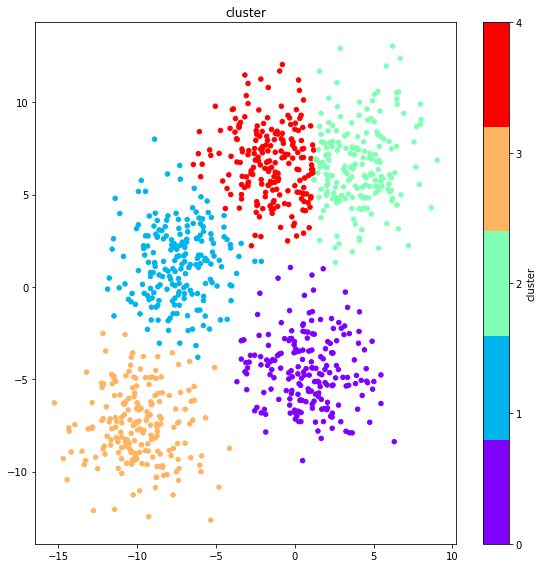

In [251]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

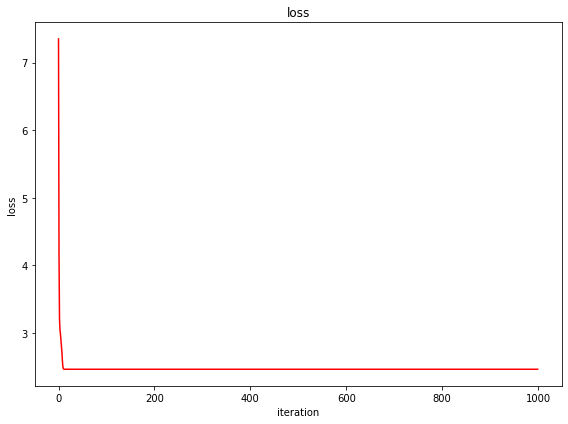

In [252]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

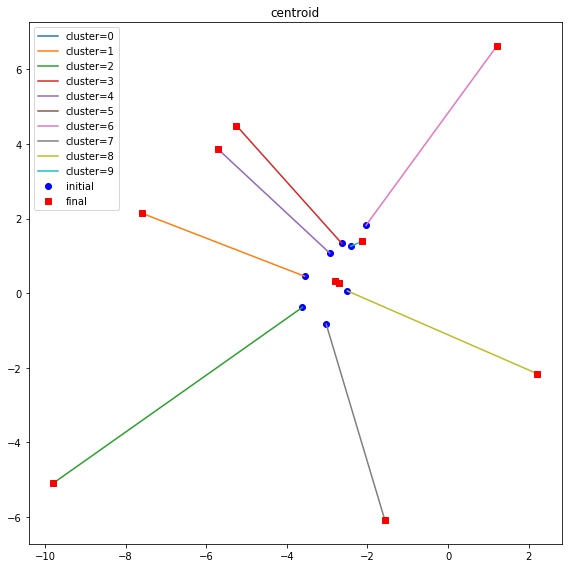

In [98]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

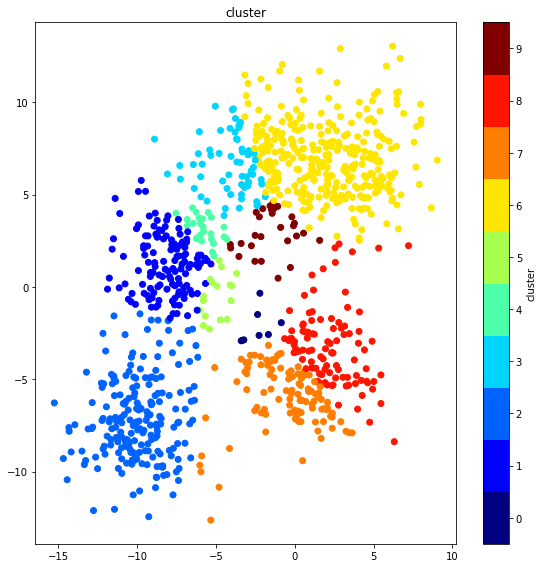

In [99]:
plot_cluster(feature, label_feature, label_cluster)

***